# Introduction

The timeseries module provides the TimeSeries class which deals with all 1D timeseries (sizedistribution timeseries are considered 2D timeseries and are delt with in a different place). Usually when reading in any type of data, that is in some way a time series it will end up beeing a TimeSeries instance. Data in a TimeSeries is stored at TimeSeries.data in form of a pandas DataFrame instance.

# Imports

In [4]:
from atmPy.general import timeseries
from atmPy.aerosols.instruments.POPS import housekeeping
from atmPy.aerosols.instruments.piccolo import piccolo
from atmPy.data_archives.arm import read_data

In [5]:
# %matplotlib nbagg
%matplotlib inline

# Averaging

In [7]:
from hagpack import plot_templates

In [8]:
read_data.arm_products.keys()

dict_keys(['tdmaapssize', 'tdmahyg', 'noaaaos', 'aosacsm', 'aipfitrh1ogrenC1', 'tdmasize', '1twr10xC1'])

In [9]:
fname = '/Users/htelg/data/ARM/SGP/'
out = read_data.read_cdf(fname, data_product=['noaaaos', 'aosacsm'], 
                         time_window=('2012-02-01','2012-02-15'), 
                         data_quality='patchy')
noaaaos = out['noaaaos']

scatt = noaaaos.scatt_coeff._del_all_columns_but('Bs_G_Dry_1um_Neph3W_1')

acsm = out['aosacsm']
acsm = acsm.mass_concentrations._del_all_columns_but('total')

In [13]:
dt = (np.arange(0,200,5, dtype=int), 'm')
dt

(array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195]),
 'm')

In [17]:
1000/60

16.666666666666668

In [22]:
dt = (np.unique(np.logspace(np.log10(1), np.log10(10000), 50, dtype=int)), 'm')
dt

(array([    1,     2,     3,     4,     5,     6,     7,     9,    11,
           13,    16,    20,    24,    29,    35,    42,    51,    62,
           75,    91,   109,   132,   159,   193,   232,   281,   339,
          409,   494,   596,   719,   868,  1048,  1264,  1526,  1842,
         2222,  2682,  3237,  3906,  4714,  5689,  6866,  8286, 10000]), 'm')

In [23]:
roll_n = acsm.rolling(#.data['Bs_G_Dry_1um_Neph3W_1'], 
                 (1, 'D'), 
                 min_good_ratio = 0.1,)
out, dt_max = roll_n.corr_timelag(scatt, dt = dt, no_of_steps=40, center = 200,
                normalize = True)
corr = roll_n.corr(scatt)

Each window contains 48 data points of which at least 4 are not nan.


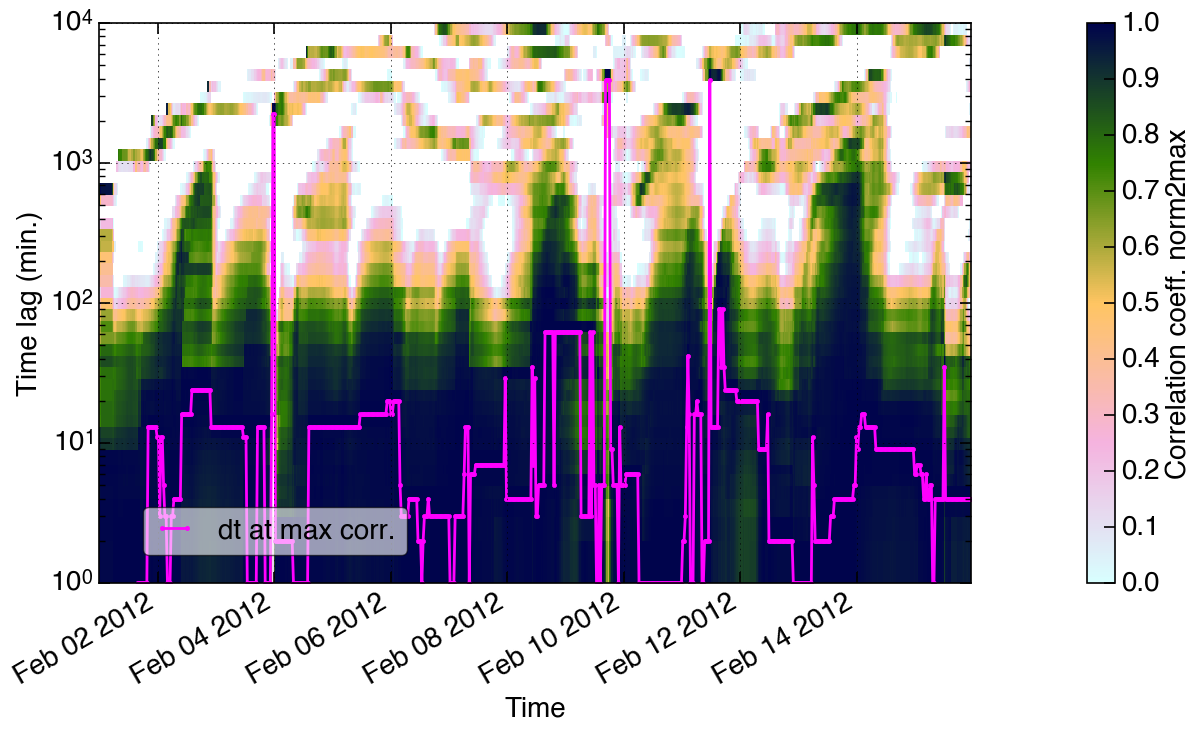

In [29]:
a = plot_templates.plot_rolling_time_laps_corr(out, dt_max, clim = (0,1))
a.set_yscale('log')

In [57]:
def aaa(line):
    if (np.isnan(line)).sum() > ((~np.isnan(line)).sum() * 0.3):
        return np.nan
    col_t = cols.copy()
    lt = line[~ np.isnan(line)]

    col_t = col_t[~ np.isnan(line)]
    argmax = lt.argmax()
    realMax = col_t[argmax]
    return realMax

cols = out.data.columns
dt_max = np.apply_along_axis(aaa, 1, out.data.values)


# values = out.data.iloc[0].values
# np.argmax(values)

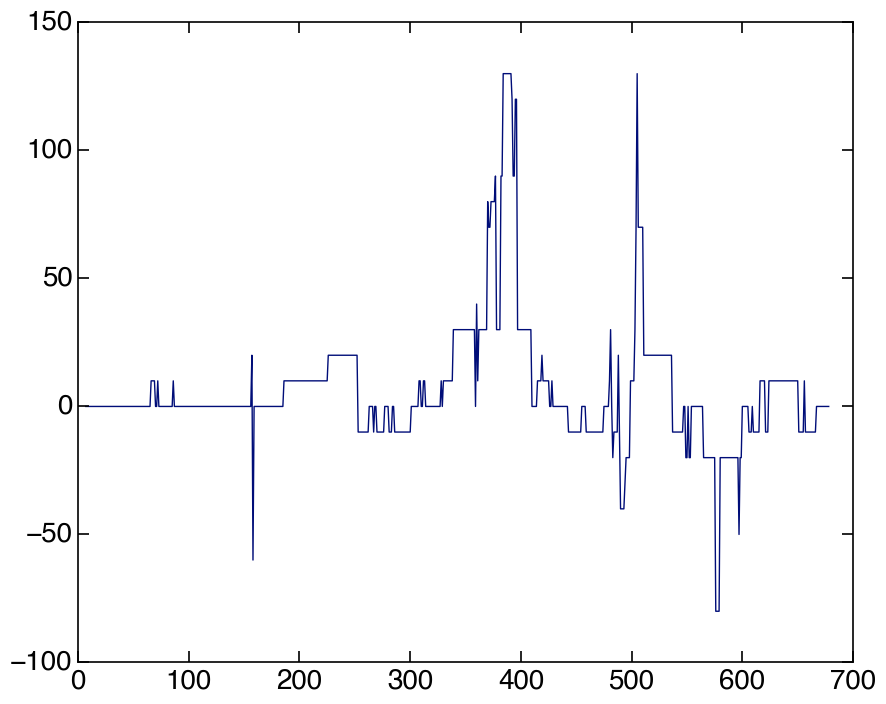

In [58]:
plt.plot(dt_max)

In [31]:
out.data.iloc[10,:]

-200    0.025572
-190    0.121269
-180   -0.118486
-170   -0.183430
-160   -0.098892
-150   -0.566790
-140   -0.862432
-130   -0.783325
-120   -0.706604
-110   -0.425822
-100   -0.165425
-90    -0.150677
-80    -0.073090
-70     0.082312
-60     0.104593
-50     0.158799
-40     0.165989
-30     0.165288
-20     0.903358
-10     0.961063
 0      1.000000
 10     0.815281
 20     0.510891
 30     0.171043
 40     0.574681
 50     0.494849
 60     0.370859
 70     0.411436
 80     0.122008
 90    -0.282306
 100   -0.374313
 110   -0.476270
 120   -0.644442
 130   -0.621102
 140   -0.580449
 150   -0.561084
 160   -0.486429
 170   -0.424558
 180   -0.400113
 190         NaN
Name: 2012-02-01 05:09:16, dtype: float64

In [25]:
dt_max

array([-200, -200, -200, -180, -180,    0,   60,  120,  130,  160,  190,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
         10,   10,   10,   10,    0,    0,   10,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,   10,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

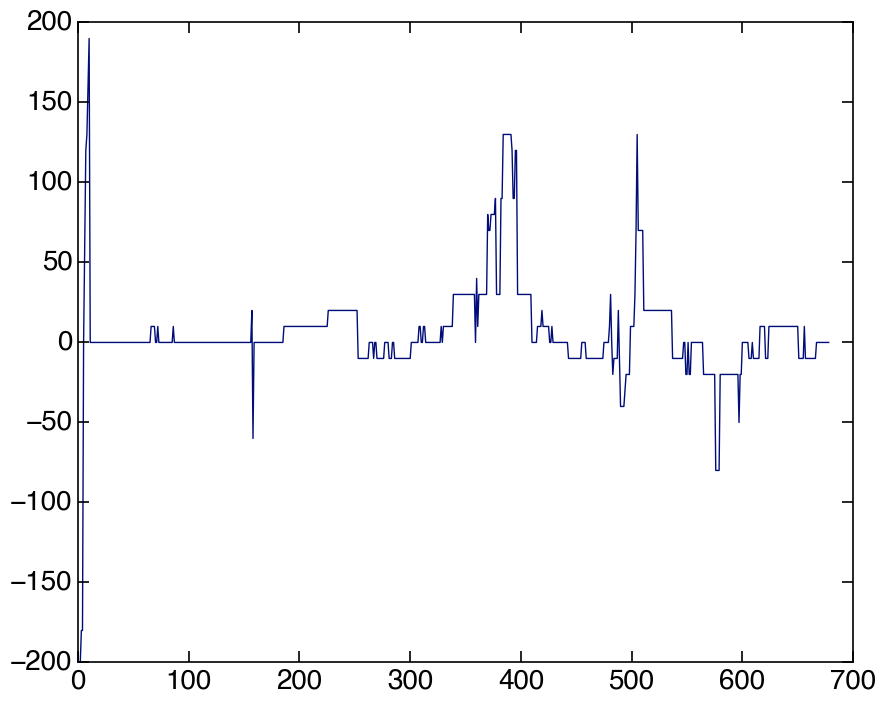

In [21]:
plt.plot(dt_max)

In [15]:
hasattr(np.array([654]), '__len__')

True

In [276]:
%%time
scatt_alig = scatt.align_to(acsm)
roll = scatt_alig.data['Bs_G_Dry_1um_Neph3W_1'].rolling(30, min_periods=1, center = True)
out = roll.corr(acsm.data['total'])
# td = np.timedelta64(15*1860,'s')
# out.index -= td

CPU times: user 24.9 ms, sys: 3.78 ms, total: 28.7 ms
Wall time: 27 ms


In [277]:
%%time 
roll = acsm.rolling(scatt, (1800 * 30, 's') , min_good_ratio=0.04)
out_old = roll.correlation()

Each window contains 30 data points of which at least 1 are not nan.


/Users/htelg/prog/atm-py/atmPy/general/timeseries.py:479: FutureWarning: TimeSeries is deprecated. Please use Series
  # self._size = merged.data.shape[0] - self._window + 1


CPU times: user 1.73 s, sys: 7.51 ms, total: 1.74 s
Wall time: 1.73 s


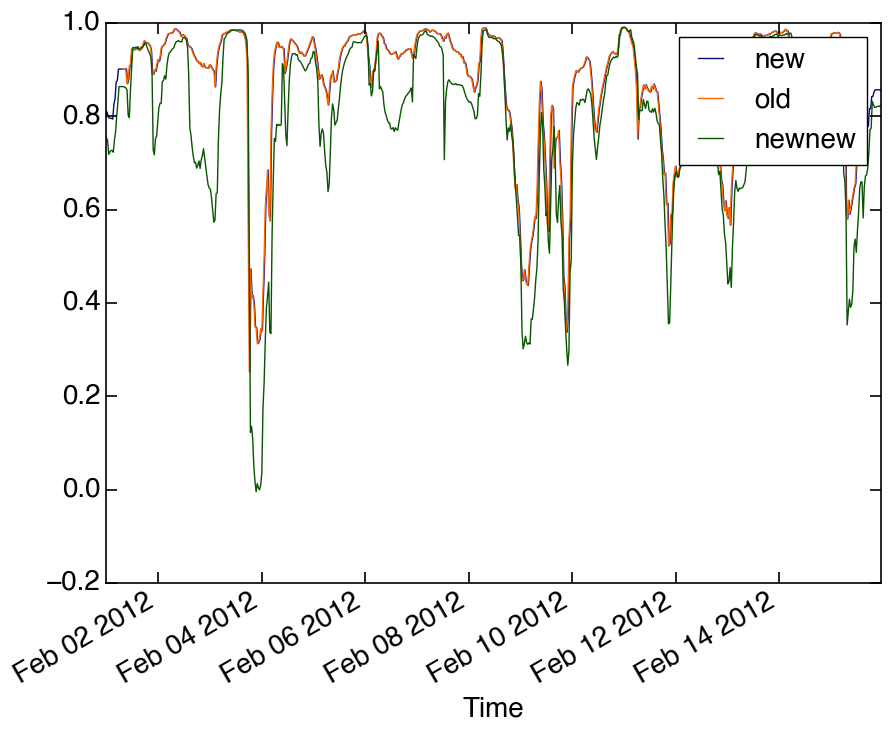

In [278]:
f,a = plt.subplots()
out.plot(ax = a, label = 'new')
out_old.plot(ax = a, label = 'old')
out_n.plot(ax = a, label = 'newnew')
a.legend()
# a.set_ylim((0,2))

# write roll subclass

In [88]:
%%time
scatt_alig = scatt.align_to(acsm)
roll = scatt_alig.data['Bs_G_Dry_1um_Neph3W_1'].rolling(30, min_periods=1, center = True)
out = roll.corr(acsm.data['total'])
# td = np.timedelta64(15*1860,'s')
# out.index -= td

CPU times: user 24.1 ms, sys: 3.89 ms, total: 28 ms
Wall time: 25.6 ms


In [ ]:
pd.core.window.Rolling()

In [ ]:
roll.corr()

In [395]:
from hagpack import plot_templates

In [446]:
class Rolling(pd.core.window.Rolling):
    def __init__(self, obj, window, min_good_ratio=0.67, 
                 verbose = True, 
                 **kwargs): 
        self.data = obj
        window = np.timedelta64(window[0], window[1])
        window = int(window / np.timedelta64(int(obj._data_period), 's'))
        min_periods = int(window * min_good_ratio)
        if obj.data.columns.shape[0] == 1:
            self._data_column = obj.data.columns[0]
        else:
            txt = 'please make sure the timeseries has only one collumn'
            raise ValueError(txt)
         
        if verbose:
            print('Each window contains %s data points of which at least %s are not nan.' % (window,
                                                                                             min_periods))
        super().__init__(obj.data[self._data_column], 
                         window, 
                         min_periods = min_periods,
                         **kwargs)
#         print(self.window)

    def corr(self, other, *args, **kwargs):
        if other.data.columns.shape[0] == 1:
            other_column = other.data.columns[0]
        else:
            txt = 'please make sure the timeseries has only one collumn'
            raise ValueError(txt)
#         other_column = 'Bs_G_Dry_1um_Neph3W_1'
        other = other.align_to(self.data)
        other = other.data[other_column]
        corr_res = super().corr(other, *args, **kwargs)
        corr_res_ts = timeseries.TimeSeries(pd.DataFrame(corr_res))
        corr_res_ts._data_period = self.data._data_period
        return corr_res_ts
    
    def corr_timelag(self, other, dt = (5, 'm'), no_of_seps = 10, center = 0, normalize = True, **kwargs):
        if other.data.columns.shape[0] == 1:
            other_column = other.data.columns[0]
        else:
            txt = 'please make sure the timeseries has only one collumn'
            raise ValueError(txt)
#         other =  acsm.copy()
#         dt = (5, 'm')
#         no_of_seps = 10
#         center = 0
        dt_array = np.arange(0, dt[0] * no_of_seps, dt[0]) - int(no_of_seps * dt[0]/2)
        out = False
        for dtt in dt_array:
            tst = other.copy()
            tst.data.index += np.timedelta64(int(dtt),dt[1])
            corr = self.corr(tst)
            if not out:
                out = corr
                out.data.columns = [dtt]
            else:
                out.data[dtt] = corr.data#[self._data_column]
                
        if normalize:     
            out = timeseries.TimeSeries_2D(out.data.apply(lambda line: line/line.max(), axis = 1))        
        else:
            out = timeseries.TimeSeries_2D(out.data)    
        
        cols  = out.data.columns
        dt_max = np.apply_along_axis(lambda arr: cols[arr.argmax()], 1, out.data.values)
        dt_max = timeseries.TimeSeries(pd.DataFrame(dt_max, index = out.data.index))
        if dt[1] == 'm':
            ylt = 'min.'
        else:
            ylt = dt[1]
        dt_max._y_label = 'Time lag (%s)'%ylt
        return out, dt_max

In [447]:
roll_n = Rolling(acsm, #.data['Bs_G_Dry_1um_Neph3W_1'], 
                 (1, 'D'), 
                 min_good_ratio = 0.1,
                 center = True)
out, dt_max = roll_n.corr_timelapse(scatt, dt = (10, 'm'), no_of_seps=40, 
                normalize = True)
corr = roll_n.corr(scatt)

Each window contains 48 data points of which at least 4 are not nan.


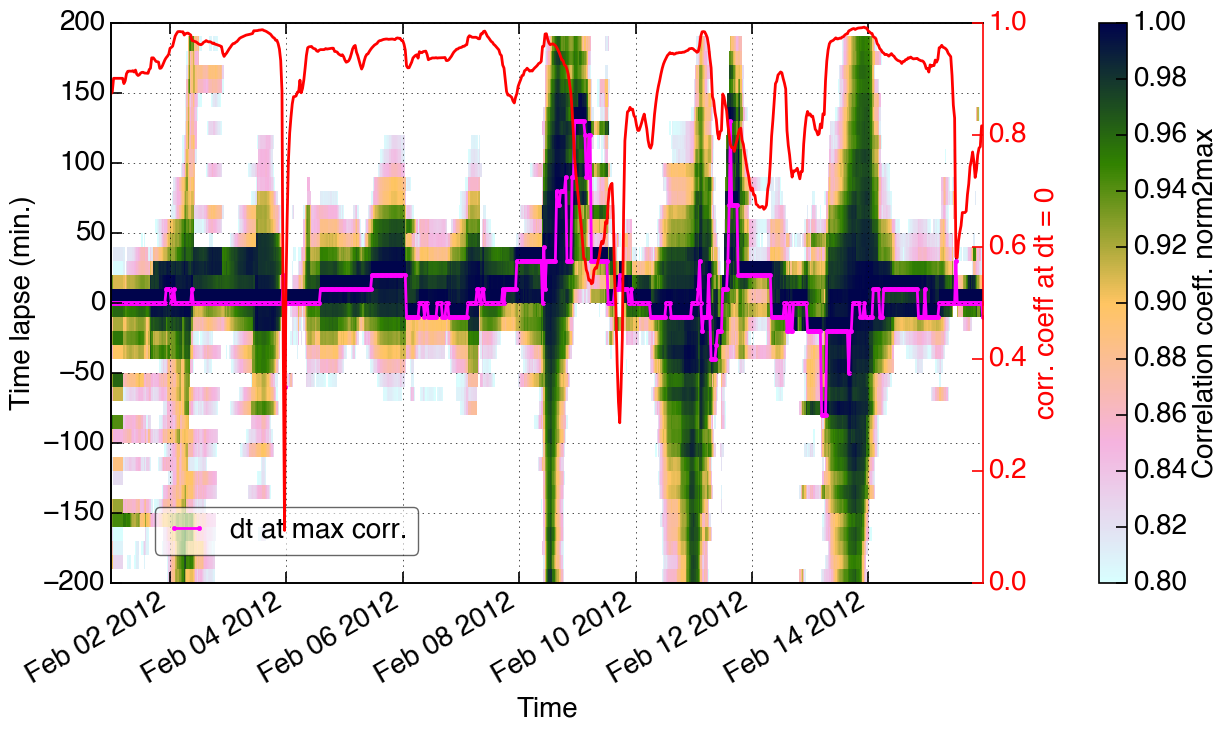

In [448]:

plot_templates.plot_rolling_time_laps_corr(out, dt_max, corr)

In [ ]:
###### f,a,_,_ =out.plot()
dt_max.plot(ax = a)
corr.plot(ax = a)

In [279]:
%%time
roll_n = Rolling(acsm, #.data['Bs_G_Dry_1um_Neph3W_1'], 
                 (1800 * 30, 's'), 
                 min_good_ratio = 0.1,
                 center = True)
out_n = roll_n.corr(scatt)

Each window contains 30 data points of which at least 3 are not nan.
in corr
CPU times: user 24.1 ms, sys: 2.72 ms, total: 26.8 ms
Wall time: 25 ms


In [339]:
%%time 
roll = acsm.rolling(scatt, (1800 * 30, 's') , min_good_ratio=0.04)
tl_corr_old = roll.timelaps_correlation()


Each window contains 30 data points of which at least 1 are not nan.


/Users/htelg/prog/atm-py/atmPy/general/timeseries.py:479: FutureWarning: TimeSeries is deprecated. Please use Series
  # self._size = merged.data.shape[0] - self._window + 1


CPU times: user 1min 15s, sys: 69.6 ms, total: 1min 15s
Wall time: 1min 15s


(<matplotlib.figure.Figure at 0x122fc2c18>,
 <matplotlib.colorbar.Colorbar at 0x1231aef28>)

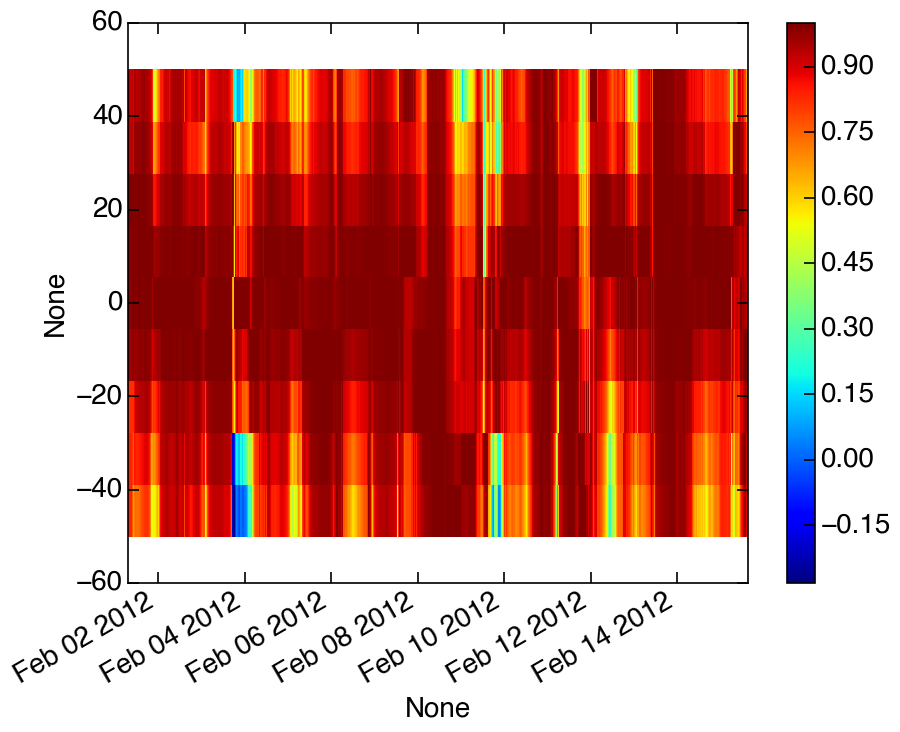

In [340]:
tl_corr_old[1].plot()

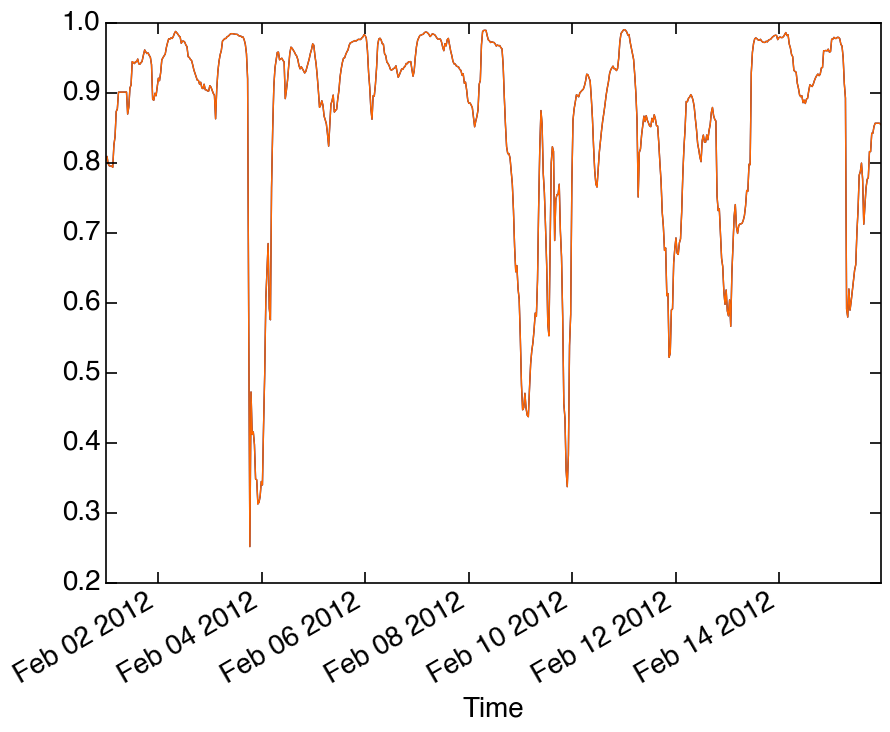

In [280]:
f,a = plt.subplots()
out.plot(ax = a)
out_n.plot(ax = a )

In [64]:
scatt_avg = scatt.average_time((3,'h'))
scatt_avg_n = scatt.average_time_new((3,'h'))

AttributeError: 'TimeSeries' object has no attribute 'average_time_new'

In [65]:
scatt_align = scatt.align_to(scatt_avg)
scatt_align_n = scatt.align_to_new(scatt_avg_n)

NameError: name 'scatt_avg_n' is not defined

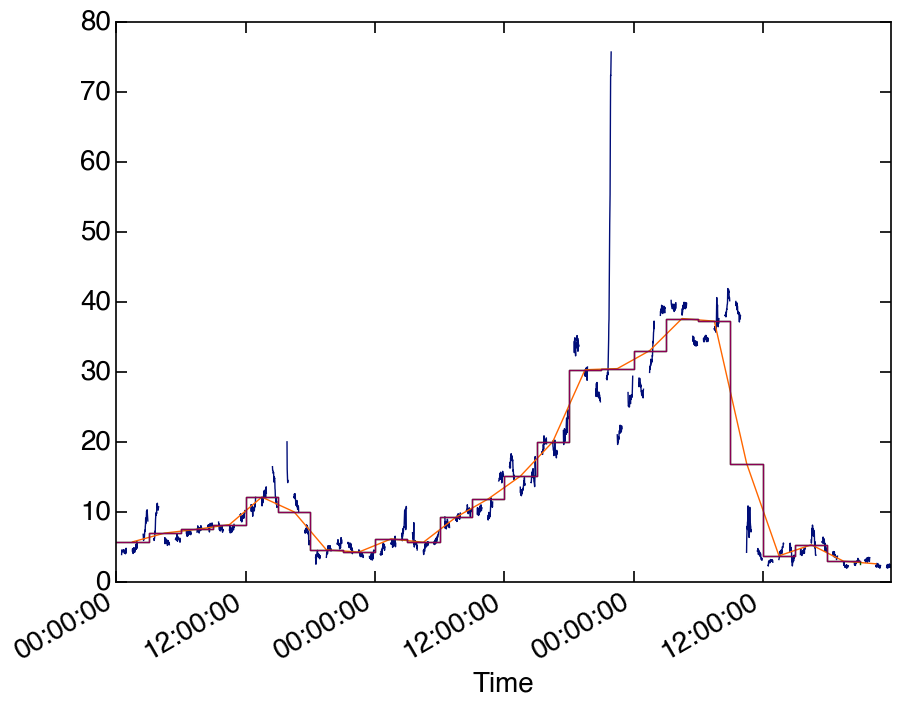

In [10]:
f,a = plt.subplots()
scatt.plot(ax = a)
scatt_avg.plot(ax = a)
scatt_avg_n.plot(ax = a)
g = a.get_lines()[-1]
g.set_drawstyle('steps-post')

# scatt_align.plot(ax = a)
scatt_align_n.plot(ax = a)
g = a.get_lines()[-1]
g.set_drawstyle('steps-post')

## rolling time lage correlation

In [3]:
read_data.arm_products.keys()

dict_keys(['noaaaos', 'aosacsm', 'tdmaapssize', 'tdmahyg', '1twr10xC1', 'aipfitrh1ogrenC1', 'tdmasize'])

In [4]:
fname = '/Users/htelg/data/ARM/SGP/'
out = read_data.read_cdf(fname, data_product=['tdmaapssize', 'aosacsm'], 
                         time_window=('2012-02-01','2012-02-10'), 
                         data_quality='patchy')
tdma = out['tdmaapssize']
acsm = out['aosacsm']

In [5]:
tv = tdma.size_distribution.particle_volume_concentration
av = acsm.mass_concentrations._del_all_columns_but('total') 

In [6]:
roll = tv.rolling(av,(5,'D'))
tlc_max, tlc_tlc = roll.timelaps_correlation(no_of_steps=20)

Each window contains 172 data points of which at least 115 are not nan.


/Users/htelg/prog/atm-py/atmPy/general/timeseries.py:409: FutureWarning: TimeSeries is deprecated. Please use Series
  self._timestamps = _pd.TimeSeries(_pd.to_datetime(_pd.Series(_np.zeros(self._size))))


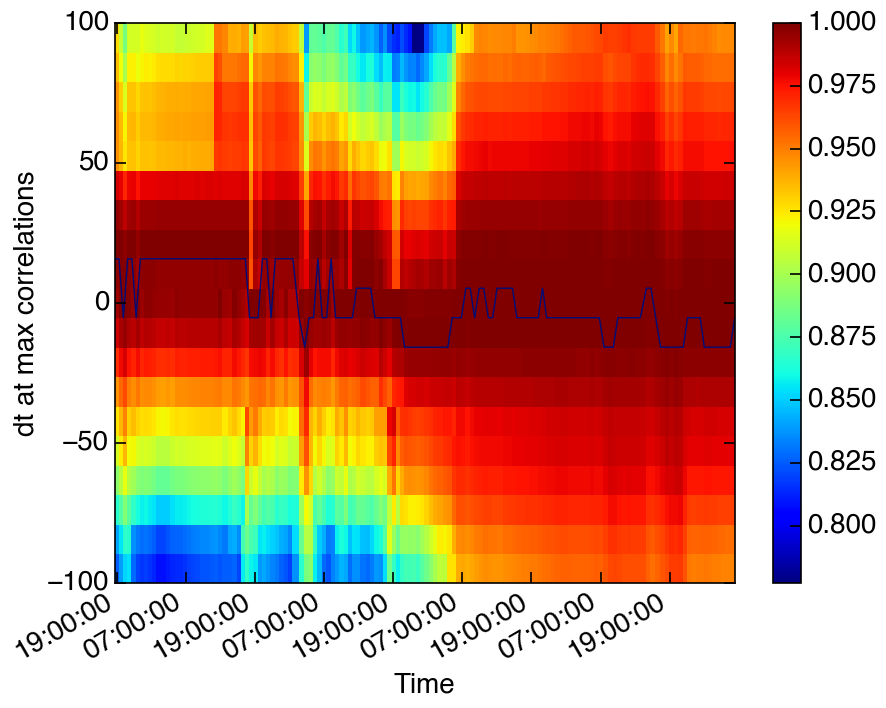

In [7]:
f,a,_,_ = tlc_tlc.plot()
tlc_max.plot(ax = a)

In [20]:
%%timeit
a = np.zeros(3) * np.nan
a

The slowest run took 9.17 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 3.37 µs per loop


In [21]:
%%timeit
a = np.zeros(3)
a[:] = np.nan
a

The slowest run took 9.61 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.48 µs per loop


In [14]:
a

array([ nan,  nan,  nan])

# Load/save

## netCDF

In [ ]:
fname = '/Users/htelg/data/ARM/SGP/sgpnoaaaosC1.b1.20120102.000000.cdf'
ts = read_data.read_cdf(fname).scatt_coeff

In [ ]:
ts = ts._del_all_columns_but('Bs_G_Dry_1um_Neph3W_1')

In [ ]:
ts.plot()

## csv

Usually a TimeSeries is generated when data representing a timeseries is loaded, e.g. POPS housekeeping data, or piccolo telemetry data.

In [6]:
pops_hk = housekeeping.read_csv('./data/POPS_housekeeping.csv')
picco_tel = piccolo.read_csv('./data/piccolo.log')

reading ./data/POPS_housekeeping.csv


# Features

## Plotting

In [ ]:
fname = '/Users/htelg/data/ARM/SGP/sgpnoaaaosC1.b1.20120102.0000'
ts = read_data.read_cdf(fname).scatt_coeff

In [ ]:
ts = ts._del_all_columns_but('Bs_G_Dry_1um_Neph3W_1')

In [ ]:
ts.plot()

In [ ]:
bla = ts.plot_wrapped(period=5, max_wraps=23)

## merge TimeSeries instances with different time axes

This attribute of a TimeSeries class allows the projection of a different instance on the current one. The resulting instance will have the collumns of both instances but with the time axes according to the first instance.

In [ ]:
pops_hk_merged = pops_hk.merge(picco_tel)
# pops_hk_merged.data

After merging it is possible to plot for example the Particle rate as a function of altitude. Columns which where previously in different Timeseries with different time intervals and time values.

In [ ]:
f,ax = plt.subplots()
ax.plot(pops_hk_merged.data.Particle_rate_nops, pops_hk_merged.data.Altitude)
ax.set_ylabel('Altitude (m)')
ax.set_xlabel('Particle rate (#/s)')

## Plot on map (probably not working right now)

When a TimeSeries instance has data columns named 'Lat' and 'Lon' it is possible to do a quick drowing of e.g. fligh path on a map. This uses matplotlib basemap.

In [ ]:
pops_hk_merged.plot_map(resolution = 'f')

# correlate time series

In [ ]:
data_product = ['aosacsm', 'noaaaos']
time_window=('2012-01-01', '2012-04-01')
folder = '/Users/htelg/data/ARM/SGP/'
out = read_data.read_cdf(folder, data_product=data_product, time_window=time_window, data_quality='good', verbose=False)

aosacsm = out['aosacsm']
noaaaos = out['noaaaos']

acsm_tm = timeseries.TimeSeries(pd.DataFrame(aosacsm.mass_concentrations.data['total']))
acsm_tm._data_period = aosacsm._data_period

noaa_scatt = timeseries.TimeSeries(pd.DataFrame(noaaaos.scatt_coeff.data['Bs_G_Dry_1um_Neph3W_1']))
noaa_scatt._data_period = noaaaos._data_period

In [ ]:
out = acsm_tm.correlate_to(noaa_scatt)
out.plot_pearsonANDoriginal_data()

In [ ]:
out = acsm_tm.rolling_correlation(noaa_scatt, (7,'D'))
out.plot()